# 第二章　小売店のデータでテータ加工を行う

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
uriage_data = pd.read_csv('Data100/2_data/uriage.csv')
uriage_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商 品 S,NaN,浅田賢二
2,2019-05-11 19:42:07,商 品 a,NaN,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品a,NaN,平田鉄二


In [3]:
uriage_data.isnull().sum()

purchase_date      0
item_name          0
item_price       387
customer_name      0
dtype: int64

In [4]:
kokyaku_data = pd.read_excel('Data100/2_data/kokyaku_daicho.xlsx')
kokyaku_data.head()

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
1,岡田 敏也,おかだ としや,E市,okada_toshiya@example.com,42782
2,芳賀 希,はが のぞみ,A市,haga_nozomi@example.com,2018/01/07
3,荻野 愛,おぎの あい,F市,ogino_ai@example.com,42872
4,栗田 憲一,くりた けんいち,E市,kurita_kenichi@example.com,43127


In [5]:
kokyaku_data.isnull().sum()

顧客名        0
かな         0
地域         0
メールアドレス    0
登録日        0
dtype: int64

In [6]:
kokyaku_data.head(3)

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
1,岡田 敏也,おかだ としや,E市,okada_toshiya@example.com,42782
2,芳賀 希,はが のぞみ,A市,haga_nozomi@example.com,2018/01/07


In [7]:
uriage_data['item_name'].unique()

array(['商品A', '商 品 S', '商 品 a', '商品Z', '商品a', '商品S', '商品 a', '商品V', '商品O',
       '商 品U', '商品L', '商  品V', '商 品O', '商品C', '商品I', '商品r', '商品X', '商品 g',
       '商品R', '商品P', '商品Q', '商品y', '商品 A', '商品N', '商品W', '商 品E', '商品K',
       '商品B', '商品F', '商 品s', '  商品W', ' 商 品 n', '商 品F', '商品D', '商品M',
       '商品Y', '商品U', '商品H', '商品T', '商品J', '商  品O', '商品E', '商  品Q', ' 商品S',
       ' 商品M', '商  品T', '商品G', '商 品G', ' 商品P', ' 商品E', '商 品N', '商 品Y',
       '商品 J', '商品 V', '商品 K', '商 品V', '商 品D', '商 品A', '商品 F', '商品 H',
       '商 品K', '商 品T', '商品 X', '商品 Q', '商 品X', '商 品H', '商 品C', '商品 B',
       '商品 O', '商品 T', '商品v', '商品p', '商品i', '商品 w', '商 品 s', '商 品 q',
       '商品s', '商品l', '商品t', '商品k', '商品g', '商品o', '商品 R', '商品 S', '商 品M',
       '商品j', '商品d', '商品 I', '商品 E', '商品 o', '商品c', '商品 v', '商品e', '商品x',
       '商 品I', ' 商品W', ' 商品X', '商品 M', '商 品P'], dtype=object)

In [8]:
uriage_data['item_price'].unique()

array([ 100.,   nan, 2600., 1900., 2200., 1500., 2100., 1200.,  300.,
        900., 1800., 2400.,  700., 1600., 1700., 2500., 2300.,  500.,
       1100.,  200.,  600., 1400.,  400., 1300.,  800., 2000., 1000.])

In [9]:
def convert_str(x):
    x = x.upper()
    x = x.replace(' ', '')
    ans = x.replace('　', '')
    return ans


In [10]:
uriage_data['item_name'] = uriage_data['item_name'].apply(convert_str)
uriage_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商品S,NaN,浅田賢二
2,2019-05-11 19:42:07,商品A,NaN,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品A,NaN,平田鉄二


In [11]:
uriage_data['item_name'].unique()

array(['商品A', '商品S', '商品Z', '商品V', '商品O', '商品U', '商品L', '商品C', '商品I',
       '商品R', '商品X', '商品G', '商品P', '商品Q', '商品Y', '商品N', '商品W', '商品E',
       '商品K', '商品B', '商品F', '商品D', '商品M', '商品H', '商品T', '商品J'],
      dtype=object)

In [12]:
item = uriage_data.groupby('item_name').mean().reset_index()
item.head()

,item_name,item_price
0,商品A,100.0
1,商品B,200.0
2,商品C,300.0
3,商品D,400.0
4,商品E,500.0


In [13]:
uriage_data_merge = uriage_data.merge(item, on='item_name', how='left')
uriage_data_merge.drop('item_price_x', inplace=True, axis=1)
uriage_data_merge.head()

,purchase_date,item_name,customer_name,item_price_y
0,2019-06-13 18:02:34,商品A,深井菜々美,100.0
1,2019-07-13 13:05:29,商品S,浅田賢二,1900.0
2,2019-05-11 19:42:07,商品A,南部慶二,100.0
3,2019-02-12 23:40:45,商品Z,麻生莉緒,2600.0
4,2019-04-22 03:09:35,商品A,平田鉄二,100.0


In [29]:
# type(uriage_data_merge['purchase_date'])
uriage_data_merge['purchase_date'] = pd.to_datetime(uriage_data_merge['purchase_date'])

In [31]:
uriage_data_merge['purchase_month'] = uriage_data_merge['purchase_date'].dt.strftime('%Y%m')
uriage_data_merge.head()

,purchase_date,item_name,customer_name,item_price_y,purchase_month
0,2019-06-13 18:02:34,商品A,深井菜々美,100.0,201906
1,2019-07-13 13:05:29,商品S,浅田賢二,1900.0,201907
2,2019-05-11 19:42:07,商品A,南部慶二,100.0,201905
3,2019-02-12 23:40:45,商品Z,麻生莉緒,2600.0,201902
4,2019-04-22 03:09:35,商品A,平田鉄二,100.0,201904


In [14]:
kokyaku_data['顧客名'].head()

0     須賀ひとみ
1    岡田　 敏也
2      芳賀 希
3     荻野  愛
4     栗田 憲一
Name: 顧客名, dtype: object

In [15]:
kokyaku_data['顧客名'] = kokyaku_data['顧客名'].apply(lambda x: x.replace(' ', '').replace('　', ''))

In [16]:
kokyaku_data.head()

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
1,岡田敏也,おかだ としや,E市,okada_toshiya@example.com,42782
2,芳賀希,はが のぞみ,A市,haga_nozomi@example.com,2018/01/07
3,荻野愛,おぎの あい,F市,ogino_ai@example.com,42872
4,栗田憲一,くりた けんいち,E市,kurita_kenichi@example.com,43127


In [17]:
fig_is_serial = kokyaku_data['登録日'].astype('str').str.isdigit()
fig_is_serial.sum()

22

In [18]:
fromSerial = pd.to_timedelta(kokyaku_data.loc[fig_is_serial, '登録日'].astype('float') -2, unit='D') + pd.to_datetime('1900/01/01')
fromSerial

1     2017-02-16
3     2017-05-17
4     2018-01-27
21    2017-07-04
27    2017-06-15
47    2017-01-06
49    2017-07-13
53    2017-04-08
76    2018-03-29
80    2018-01-10
99    2017-05-30
114   2018-06-03
118   2018-01-29
122   2018-04-16
139   2017-05-25
143   2017-03-24
155   2017-01-19
172   2018-03-22
179   2017-01-08
183   2017-07-24
186   2018-07-13
192   2018-06-08
Name: 登録日, dtype: datetime64[ns]

What's シリアル値？
**timedeltaとは？**
　timedelta	二つのdatetime型の値の差を、日・秒・マイクロ秒で表す

In [19]:
fromString = pd.to_datetime(kokyaku_data.loc[~fig_is_serial, '登録日'])
fromString

0     2018-01-04
2     2018-01-07
5     2017-06-20
6     2018-06-11
7     2017-05-19
         ...    
195   2017-06-20
196   2018-06-20
197   2017-04-29
198   2019-04-19
199   2019-04-23
Name: 登録日, Length: 178, dtype: datetime64[ns]

**&: and, |: or, ~: not**

In [20]:
kokyaku_data['登録日'] = pd.concat([fromSerial, fromString])
kokyaku_data.head()

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018-01-04
1,岡田敏也,おかだ としや,E市,okada_toshiya@example.com,2017-02-16
2,芳賀希,はが のぞみ,A市,haga_nozomi@example.com,2018-01-07
3,荻野愛,おぎの あい,F市,ogino_ai@example.com,2017-05-17
4,栗田憲一,くりた けんいち,E市,kurita_kenichi@example.com,2018-01-27


In [21]:
kokyaku_data['登録年月'] = kokyaku_data['登録日'].dt.strftime('%Y%m')
result = kokyaku_data.groupby('登録年月').count()['顧客名']
result

登録年月
201701    15
201702    11
201703    14
201704    15
201705    14
201706    13
201707    17
201801    13
201802    15
201803    17
201804     5
201805    19
201806    13
201807    17
201904     2
Name: 顧客名, dtype: int64

## 顧客名をキーにして2つのデータを結合する

In [37]:
join_data = kokyaku_data.merge(uriage_data_merge, left_on='顧客名', right_on='customer_name', how='left')
join_data.drop('customer_name', axis=1, inplace=True)
join_data.head()

,顧客名,かな,地域,メールアドレス,登録日,登録年月,purchase_date,item_name,item_price_y,purchase_month
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018-01-04,201801,2019-02-24 01:07:56,商品C,300.0,201902
1,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018-01-04,201801,2019-05-08 15:42:01,商品P,1600.0,201905
2,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018-01-04,201801,2019-07-03 07:49:05,商品M,1300.0,201907
3,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018-01-04,201801,2019-01-02 13:52:15,商品L,1200.0,201901
4,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018-01-04,201801,2019-06-29 04:58:36,商品R,1800.0,201906


## クレンジングしたデータを出力する前に整形するようにね！

In [38]:
dump_data = join_data[['purchase_date', 'purchase_month', 'item_name', 'item_price_y','顧客名', 'かな', '地域', '登録日', '登録年月' ]]
dump_data = dump_data.rename(columns={'item_price_y': 'item_price'})
dump_data.head()

,purchase_date,purchase_month,item_name,item_price,顧客名,かな,地域,登録日,登録年月
0,2019-02-24 01:07:56,201902,商品C,300.0,須賀ひとみ,すが ひとみ,H市,2018-01-04,201801
1,2019-05-08 15:42:01,201905,商品P,1600.0,須賀ひとみ,すが ひとみ,H市,2018-01-04,201801
2,2019-07-03 07:49:05,201907,商品M,1300.0,須賀ひとみ,すが ひとみ,H市,2018-01-04,201801
3,2019-01-02 13:52:15,201901,商品L,1200.0,須賀ひとみ,すが ひとみ,H市,2018-01-04,201801
4,2019-06-29 04:58:36,201906,商品R,1800.0,須賀ひとみ,すが ひとみ,H市,2018-01-04,201801


In [41]:
dump_data.to_csv('Data100/dump_data.csv', index=False)

In [42]:
import_data = pd.read_csv('Data100/dump_data.csv')
import_data.head()

,purchase_date,purchase_month,item_name,item_price,顧客名,かな,地域,登録日,登録年月
0,2019-02-24 01:07:56,201902.0,商品C,300.0,須賀ひとみ,すが ひとみ,H市,2018-01-04 00:00:00,201801
1,2019-05-08 15:42:01,201905.0,商品P,1600.0,須賀ひとみ,すが ひとみ,H市,2018-01-04 00:00:00,201801
2,2019-07-03 07:49:05,201907.0,商品M,1300.0,須賀ひとみ,すが ひとみ,H市,2018-01-04 00:00:00,201801
3,2019-01-02 13:52:15,201901.0,商品L,1200.0,須賀ひとみ,すが ひとみ,H市,2018-01-04 00:00:00,201801
4,2019-06-29 04:58:36,201906.0,商品R,1800.0,須賀ひとみ,すが ひとみ,H市,2018-01-04 00:00:00,201801


In [74]:
import_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
purchase_date     2999 non-null object
purchase_month    2999 non-null float64
item_name         2999 non-null object
item_price        2999 non-null float64
顧客名               3000 non-null object
かな                3000 non-null object
地域                3000 non-null object
登録日               3000 non-null object
登録年月              3000 non-null int64
dtypes: float64(2), int64(1), object(6)
memory usage: 211.1+ KB


In [75]:
import_data['item_price'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999     True
Name: item_price, Length: 3000, dtype: bool

In [78]:
import_data.drop(2999,axis=0, inplace=True)

In [79]:
x = '商品A'
x.split('商品')[1]

'A'

In [80]:
x = import_data['item_name'][3]
str(x)
type(x)

str

In [81]:
def split_item(x):
    ans = x.split('商品')[1]
    return ans

split_item('商品A')

'A'

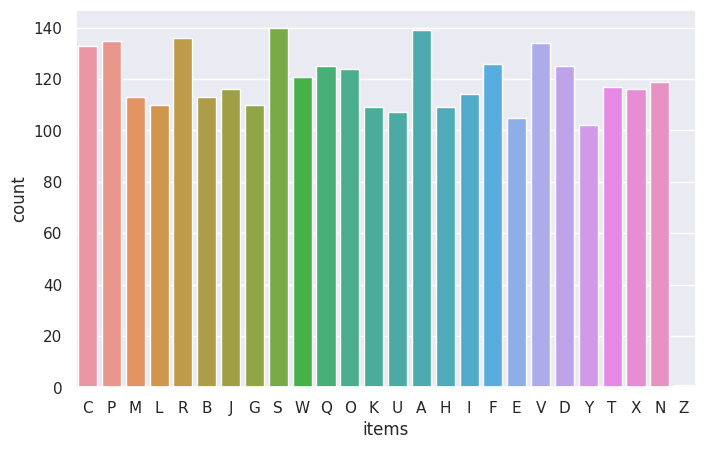

In [84]:
sns.set()
import_data['items'] = import_data['item_name'].astype(str).apply(split_item)

fig, ax = plt.subplots(figsize=(8,5), dpi = 100)
ax = sns.countplot(x='items', data=import_data);